In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 12
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
data105 = pd.read_csv('105v2.csv', parse_dates=True, index_col='DateTime',encoding="windows-1252") # или 105
data105.head(5)

,AffinityIndex,SerialNumber,H,Tmean,WmeanH,WindDirectionH(Â°),WminH,WmaxH,WmeanV,AtmosphericPressure,RelativeHumidity,TdewPoint(Â°C),WaterVaporElasticity,AbsolutusHumidity,DensityofAir,SpeedofSoundinAir
DateTime,,,,,,,,,,,,,,,,
2017-07-22 00:01:00,6,12427AMK-03,15,15.86,0.20,94.53,0.01,0.44,-0.13,750.45,100.0,15.86,17.99,14.53,1.1954,342.12
2017-07-22 00:02:00,6,12427AMK-03,15,15.88,0.28,104.28,0.15,0.53,-0.19,750.45,100.0,15.88,18.01,14.55,1.1953,342.14
2017-07-22 00:03:00,6,12427AMK-03,15,15.87,0.23,68.53,0.11,0.36,-0.19,750.45,100.0,15.87,17.99,14.54,1.1954,342.13
2017-07-22 00:04:00,6,12427AMK-03,15,15.95,0.17,47.04,0.01,0.33,-0.18,750.45,100.0,15.95,18.09,14.62,1.1950,342.18
2017-07-22 00:05:00,6,12427AMK-03,15,16.01,0.06,11.99,0.01,0.22,-0.19,750.45,100.0,16.01,18.16,14.68,1.1947,342.22


In [3]:
del data105['AffinityIndex'] 
del data105['SerialNumber'] 
del data105['H'] 
del data105['WminH'] 
del data105['WmaxH'] 
del data105['WindDirectionH(Â°)'] 
del data105['TdewPoint(Â°C)'] 
del data105['WaterVaporElasticity'] 
del data105['AbsolutusHumidity'] 
del data105['DensityofAir'] 
del data105['SpeedofSoundinAir'] 

In [4]:
means105 = data105.groupby(pd.Grouper(freq='MS')).mean()  # ПЕРИОД
means105

,Tmean,WmeanH,WmeanV,AtmosphericPressure,RelativeHumidity
DateTime,,,,,
2017-07-01,20.591039,1.442656,-0.018057,744.903283,78.523526
2017-08-01,16.711198,1.438220,-0.102971,751.472660,76.955654
2017-09-01,8.238210,1.709127,-0.106688,752.189035,86.212431
2017-10-01,1.822292,1.949373,-0.001378,757.631387,87.391312
2017-11-01,-2.027126,2.553100,-0.345352,754.705956,97.254665
2017-12-01,-8.771682,2.598501,0.088342,756.654681,99.278491
2018-01-01,-20.350205,2.589661,-0.033851,767.692608,94.409134
2018-02-01,-14.975657,1.632211,-0.056405,766.782755,91.435701
2018-03-01,-6.291295,2.904851,-0.263389,746.272232,74.863899


In [5]:
#pd.set_option('display.max_rows', 500)

per_temp105 = means105['Tmean']  #24     48 ТЕМПЕРАТУРА

per_temp105

DateTime
2017-07-01    20.591039
2017-08-01    16.711198
2017-09-01     8.238210
2017-10-01     1.822292
2017-11-01    -2.027126
2017-12-01    -8.771682
2018-01-01   -20.350205
2018-02-01   -14.975657
2018-03-01    -6.291295
2018-04-01     3.413716
2018-05-01     5.837447
2018-06-01    19.910579
2018-07-01    18.709187
2018-08-01    16.044498
2018-09-01    11.896020
2018-10-01     5.511829
2018-11-01   -10.063837
2018-12-01   -20.772218
2019-01-01   -13.442275
2019-02-01   -15.492891
2019-03-01    -1.165985
2019-04-01     2.936723
2019-05-01    10.045493
2019-06-01    16.250023
2019-07-01    19.421309
2019-08-01    18.038544
2019-09-01    10.635962
2019-10-01     4.499305
2019-11-01   -11.185783
2019-12-01   -10.089139
2020-01-01   -10.087288
2020-02-01    -7.049898
2020-03-01    -2.759580
2020-04-01     4.888799
Freq: MS, Name: Tmean, dtype: float64

In [6]:
per_temp105.interpolate(method='linear', inplace=True)


In [7]:
data105 = per_temp105.groupby('DateTime').sum().reset_index()
data105

,DateTime,Tmean
0,2017-07-01,20.591039
1,2017-08-01,16.711198
2,2017-09-01,8.238210
3,2017-10-01,1.822292
4,2017-11-01,-2.027126
5,2017-12-01,-8.771682
6,2018-01-01,-20.350205
7,2018-02-01,-14.975657
8,2018-03-01,-6.291295
9,2018-04-01,3.413716


In [8]:
data105 = data105.set_index('DateTime')
data105.index
data105

,Tmean
DateTime,
2017-07-01,20.591039
2017-08-01,16.711198
2017-09-01,8.238210
2017-10-01,1.822292
2017-11-01,-2.027126
2017-12-01,-8.771682
2018-01-01,-20.350205
2018-02-01,-14.975657
2018-03-01,-6.291295


In [9]:
y = data105['Tmean'].resample('MS').mean() # MS - месяц, D - день
y

DateTime
2017-07-01    20.591039
2017-08-01    16.711198
2017-09-01     8.238210
2017-10-01     1.822292
2017-11-01    -2.027126
2017-12-01    -8.771682
2018-01-01   -20.350205
2018-02-01   -14.975657
2018-03-01    -6.291295
2018-04-01     3.413716
2018-05-01     5.837447
2018-06-01    19.910579
2018-07-01    18.709187
2018-08-01    16.044498
2018-09-01    11.896020
2018-10-01     5.511829
2018-11-01   -10.063837
2018-12-01   -20.772218
2019-01-01   -13.442275
2019-02-01   -15.492891
2019-03-01    -1.165985
2019-04-01     2.936723
2019-05-01    10.045493
2019-06-01    16.250023
2019-07-01    19.421309
2019-08-01    18.038544
2019-09-01    10.635962
2019-10-01     4.499305
2019-11-01   -11.185783
2019-12-01   -10.089139
2020-01-01   -10.087288
2020-02-01    -7.049898
2020-03-01    -2.759580
2020-04-01     4.888799
Freq: MS, Name: Tmean, dtype: float64

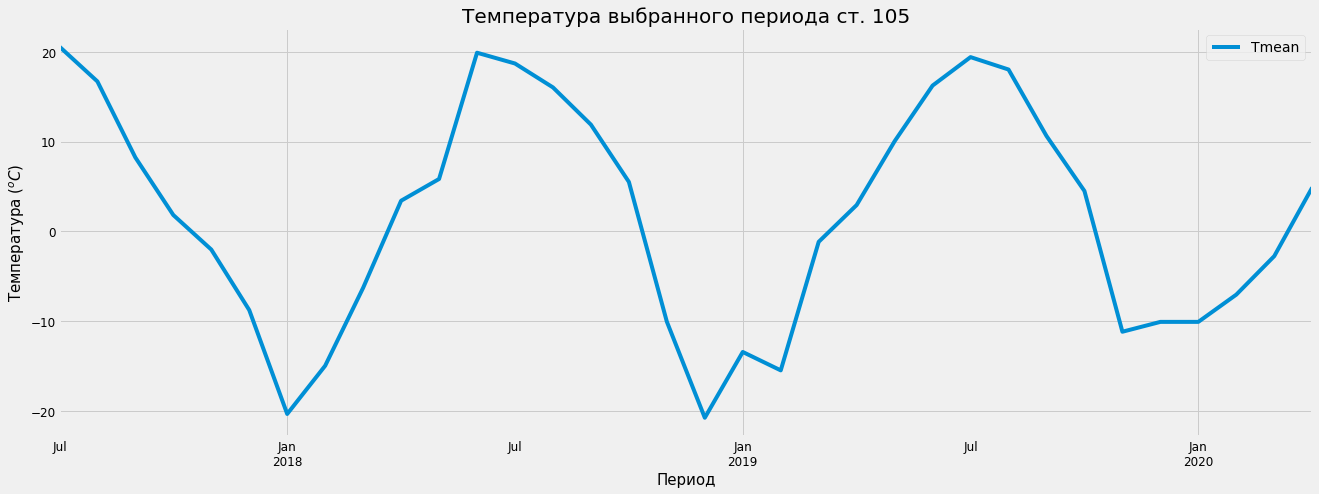

In [10]:
# Период с частотой №2-----------------------------------------------------------------------\
plt.figure()
y.plot(figsize=[20,7])
#per_temp2.plot(style='k.')
plt.title('Температура выбранного периода ст. 105', fontsize=20)
plt.grid(True)
plt.ylabel('Температура ($^oC$)',fontsize=15)
plt.xlabel('Период',fontsize=15)
plt.legend()

In [11]:
y['2017':]

DateTime
2017-07-01    20.591039
2017-08-01    16.711198
2017-09-01     8.238210
2017-10-01     1.822292
2017-11-01    -2.027126
2017-12-01    -8.771682
2018-01-01   -20.350205
2018-02-01   -14.975657
2018-03-01    -6.291295
2018-04-01     3.413716
2018-05-01     5.837447
2018-06-01    19.910579
2018-07-01    18.709187
2018-08-01    16.044498
2018-09-01    11.896020
2018-10-01     5.511829
2018-11-01   -10.063837
2018-12-01   -20.772218
2019-01-01   -13.442275
2019-02-01   -15.492891
2019-03-01    -1.165985
2019-04-01     2.936723
2019-05-01    10.045493
2019-06-01    16.250023
2019-07-01    19.421309
2019-08-01    18.038544
2019-09-01    10.635962
2019-10-01     4.499305
2019-11-01   -11.185783
2019-12-01   -10.089139
2020-01-01   -10.087288
2020-02-01    -7.049898
2020-03-01    -2.759580
2020-04-01     4.888799
Freq: MS, Name: Tmean, dtype: float64

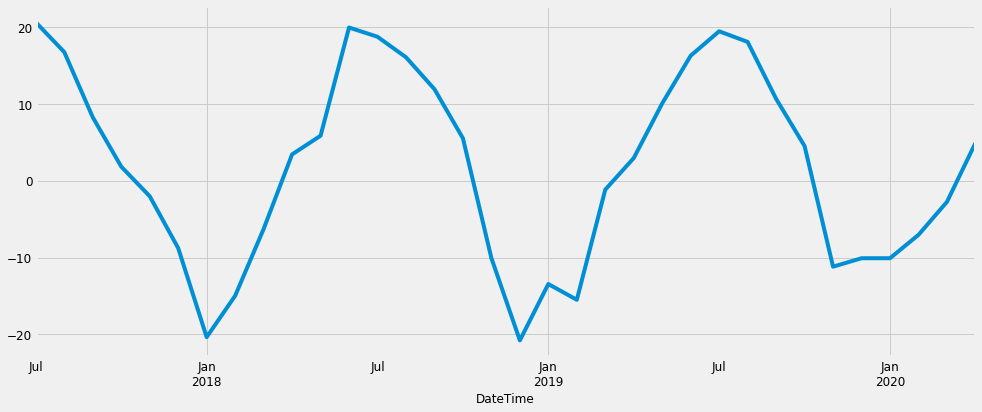

In [12]:
y.plot(figsize=(15, 6))
plt.show()

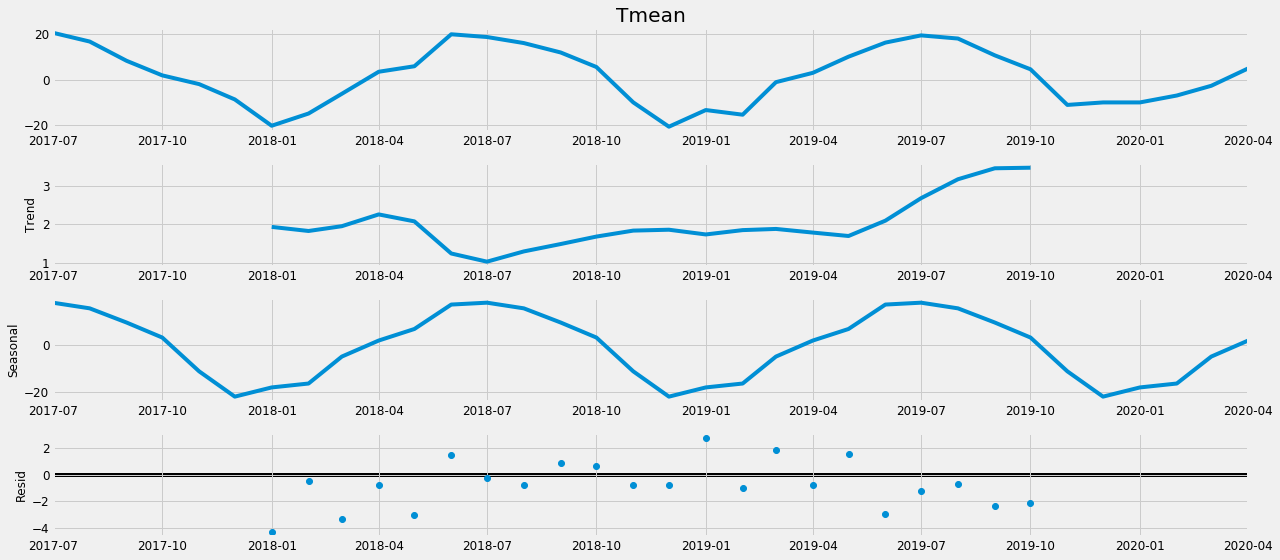

In [13]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [14]:
p = d = q = range(0, 2)

pdq = list(itertools.product(p, d, q))

seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [15]:
warnings.filterwarnings("ignore")

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,
                                            enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
            continue 

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:260.7014018308782
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:160.43289307778872
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:130.28305689144284
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:55.72737504255644
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:135.12831020114373
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:130.25513517829876
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:60.421310979920996
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:57.72676354375875
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:230.96314788280978
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:145.0282288322685
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:127.13340602148035
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:51.81703957890885
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:137.10197278305787
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:126.99105171819957
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:61.323894053606416
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:53.80870457944097
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:224.16868772608126
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:137.8565930274526

In [16]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7991      0.415     -1.925      0.054      -1.613       0.014
ma.S.L12      -0.4316      0.479     -0.901      0.367      -1.370       0.507
sigma2        19.4493     24.033      0.809      0.418     -27.655      66.554


In [17]:
# results.plot_diagnostics(figsize=(15, 12))
# plt.show()


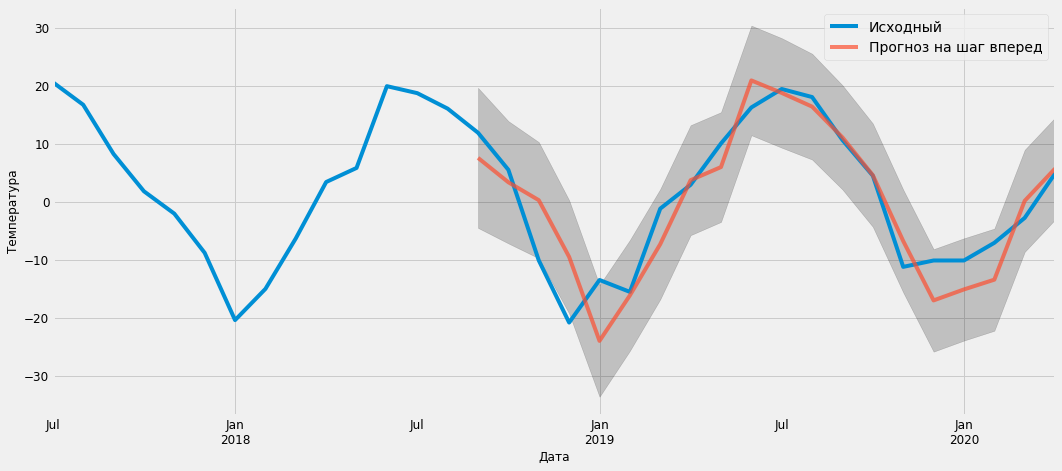

In [18]:
pred = results.get_prediction(start=pd.to_datetime('2018-09-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['2017':].plot(label='Исходный')
pred.predicted_mean.plot(ax=ax, label='Прогноз на шаг вперед', alpha=.7, figsize=(16, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Дата')
ax.set_ylabel('Температура')
plt.legend()

plt.show()

In [19]:
y_forecasted = pred.predicted_mean
y_truth = y['2018-09-01':]

mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 29.47


In [20]:

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))


The Root Mean Squared Error of our forecasts is 5.43


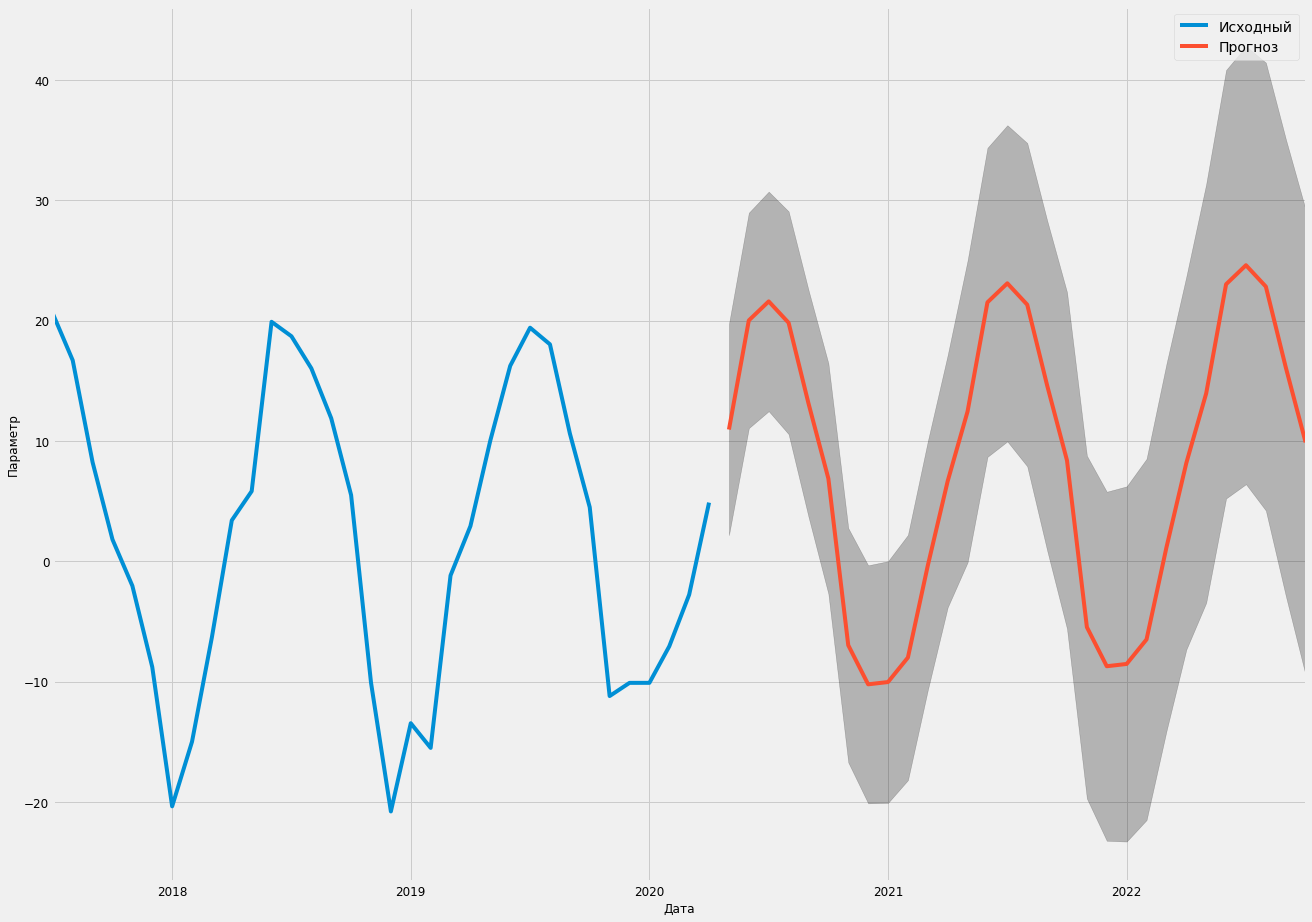

In [21]:
pred_uc = results.get_forecast(steps=30) # количество данных
pred_ci = pred_uc.conf_int()

ax = y.plot(label='Исходный', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Прогноз')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Дата')
ax.set_ylabel('Параметр')

plt.legend()
plt.show()